In [3]:
import numpy as np
import menzalib as mz
import pylab as pl
from scipy.optimize import curve_fit
from statsmodels.nonparametric.smoothers_lowess import lowess
#from scipy.interpolate import interpid

In [35]:
def mass(v):
    mass=0
    for i in range(len(v)): 
        if v[i]>v[mass]: mass=i
    return mass

def lin(x,a,b):
    return a*x + b

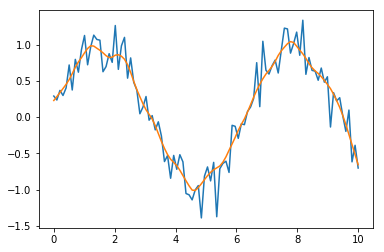

In [36]:


x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(size=len(x))*0.2
z = np.transpose(lowess(y, x,frac=0.1))
pl.plot(x,y)
pl.plot(x,z[1])
pl.show()
pl.close()

In [37]:
files=[[0,1,0],
       [2,3,2],
       [4,5,3],
       [6,7,4]]
for i in range(len(files)):
    t1,v1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[3:5]
    scala1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[1][11]
    t2,v2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[3:5]
    scala2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[1][11]
    v1=v1*10
    t1,t2=(t1-t1[0]),(t2-t2[0])
    
    pl.plot(t1,v1)
    pl.plot(t2,v2*10)
    pl.xlabel('Voltaggio[V]')
    pl.ylabel('Tempo[s]')
    pl.savefig('immagini/voltaggio-tempo_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()
    
    mas=mass(v1)
    x=np.linspace(v1[0],v1.max(),len(v1[:mas]))
    pl.plot(x,v2[:mas])
    pl.ylabel('V_c[V]')
    pl.xlabel('U_a[V]')
    pl.savefig('immagini/corrente-voltaggio_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()

In [56]:
U_E = [7.1,10.7,6.5]

Max=[[1.92, 3.60, 5.60],
     [1.92, 3.68, 5.68, 7.84],
     [1.92, 3.58, 5.76]]

Min=[[2.48, 4.24, 6.32],
     [2.88, 4.64, 6.56],
     [2.40, 4.08, 6.16]]
poptM=np.empty([len(U_E),2])
errM=poptM
poptm=poptM
errm=poptM

for i in range (len(U_E)):
    x=np.arange(1,len(Max[i])+1)
    pl.errorbar(x,Max[i],0.01,fmt='.')
    poptM[i],pcov=curve_fit(lin,x,Max[i],sigma=np.ones(len(Max[i]))*0.01)
    errM[i]=np.sqrt(np.diag(pcov))
    x=np.linspace(0.9,len(Max[i])+0.1,10)
    pl.plot(x,lin(x,*popt))
    pl.xlabel('Numero del massimo')
    pl.ylabel('U_A[V]')
    pl.title('U_E='+str(U_E[i])+'V')
    #pl.show()
    pl.savefig('immagini/Massimi_'+str(i)+'.eps',format='eps')
    pl.close()
               
    x=np.arange(1,len(Min[i])+1)
    pl.errorbar(x,Min[i],0.01,fmt='.')
    poptm[i],pcov=curve_fit(lin,x,Min[i],sigma=np.ones(len(Min[i]))*0.01)
    errm[i]=np.sqrt(np.diag(pcov))
    x=np.linspace(0.9,len(Min[i])+0.1,10)
    pl.plot(x,lin(x,*popt))
    pl.xlabel('Numero del minimo')
    pl.ylabel('U_A[V]')
    pl.title('U_E='+str(U_E[i])+'V')
    #pl.show()
    pl.savefig('immagini/Minimi_'+str(i)+'.eps',format='eps')
    pl.close()

poptm=np.transpose(poptm)
poptM=np.transpose(popstM)
errm=np.transpose(errm)
errM=np.transpose(errM)
print(poptM[0])
mz.mat_tex([mz.ns_tex(U_E),mz.ne_tex(poptm[0],errm[0]),mz.ne_tex(poptM[0],errM[0])])

[0.09237604 0.04618802 0.11547005]


Copia tutto quello che c'è tra le linee
--------------------------
\begin{tabular}{ccc}
\hline
	% qua ci va il titolo della tabella (ricorda di mettere \\ alla fine) %
 \hline
	$7.1$ & $(9.0$ $\pm$ $9.0)\times 10^{-2}$ & $(9.0$ $\pm$ $9.0)\times 10^{-2}$ \\
	$10.7$ & $(5.0$ $\pm$ $5.0)\times 10^{-2}$ & $(5.0$ $\pm$ $5.0)\times 10^{-2}$ \\
	$6.5$ & $0.1$ $\pm$ $0.1$ & $0.1$ $\pm$ $0.1$ \\
\hline
\end{tabular}
--------------------------


